In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import metrics
from statsmodels.tsa.stattools import grangercausalitytests

%matplotlib inline

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
crypto = pd.read_csv('/home/lin/教材/Financial_data/data/cryptocurrency/allcrypto.csv')
crypto['Date']=pd.to_datetime(crypto['Date'])
crypto.set_index('Date', inplace = True)
crypto.sort_index(inplace=True)
logRC = np.log(crypto).diff()
logRC.drop(logRC.index[0], inplace = True)
logRC.replace([np.inf, -np.inf], np.nan, inplace=True)
logRC.dropna(inplace=True)
print(logRC.head())

             Bitcoin  Ethereum    Ripple       NEM  Litecoin   Stellar  \
Date                                                                     
2015-08-28  0.029070  0.034191 -0.015750 -0.042111  0.013841  0.160472   
2015-08-29 -0.007025 -0.008439  0.041892  0.031749 -0.010363  0.090510   
2015-08-30 -0.004449  0.112117  0.037850  0.080043 -0.010471 -0.086694   
2015-08-31  0.005667  0.029853 -0.020837 -0.101096 -0.003515  0.047923   
2015-09-01 -0.008468 -0.007380 -0.008790  0.061875 -0.007067 -0.017908   

                Dash    Monero     Verge    Siacon  
Date                                                
2015-08-28  0.015504  0.034112 -0.133531  0.047628  
2015-08-29  0.000000 -0.010597  0.000000 -0.097638  
2015-08-30 -0.015504 -0.037503  0.133531 -0.137201  
2015-08-31  0.007782  0.017769 -0.133531 -0.060625  
2015-09-01 -0.015625 -0.018841  0.000000 -0.064539  


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [3]:
corrcoeff = logRC.corr()
corrcoeff

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.251753,0.139084,0.268532,0.494269,0.234865,0.289117,0.338252,0.156368,0.224386
Ethereum,0.251753,1.000000,0.127481,0.178049,0.248787,0.177486,0.259046,0.282242,0.087976,0.240185
Ripple,0.139084,0.127481,1.000000,0.186073,0.222997,0.493780,0.066912,0.161131,0.028562,0.101187
NEM,0.268532,0.178049,0.186073,1.000000,0.284975,0.314188,0.214994,0.200316,0.127590,0.199980
Litecoin,0.494269,0.248787,0.222997,0.284975,1.000000,0.281944,0.279734,0.287184,0.077032,0.224882
Stellar,0.234865,0.177486,0.493780,0.314188,0.281944,1.000000,0.153701,0.288804,0.084698,0.231455
Dash,0.289117,0.259046,0.066912,0.214994,0.279734,0.153701,1.000000,0.338380,0.147918,0.218835
Monero,0.338252,0.282242,0.161131,0.200316,0.287184,0.288804,0.338380,1.000000,0.122108,0.200843
Verge,0.156368,0.087976,0.028562,0.127590,0.077032,0.084698,0.147918,0.122108,1.000000,0.125942
Siacon,0.224386,0.240185,0.101187,0.199980,0.224882,0.231455,0.218835,0.200843,0.125942,1.000000


In [4]:
KenTau = logRC.corr(method='kendall')
KenTau

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.130544,0.146645,0.191949,0.449870,0.158448,0.166142,0.229290,0.155958,0.153605
Ethereum,0.130544,1.000000,0.140540,0.150541,0.159724,0.167038,0.204423,0.252394,0.073045,0.163056
Ripple,0.146645,0.140540,1.000000,0.205839,0.217995,0.316807,0.152273,0.172147,0.041373,0.147993
NEM,0.191949,0.150541,0.205839,1.000000,0.182682,0.235501,0.188961,0.189323,0.110369,0.187156
Litecoin,0.449870,0.159724,0.217995,0.182682,1.000000,0.231749,0.185582,0.217628,0.091371,0.168379
Stellar,0.158448,0.167038,0.316807,0.235501,0.231749,1.000000,0.170578,0.245895,0.065280,0.204456
Dash,0.166142,0.204423,0.152273,0.188961,0.185582,0.170578,1.000000,0.243950,0.070023,0.196408
Monero,0.229290,0.252394,0.172147,0.189323,0.217628,0.245895,0.243950,1.000000,0.102924,0.182310
Verge,0.155958,0.073045,0.041373,0.110369,0.091371,0.065280,0.070023,0.102924,1.000000,0.105098
Siacon,0.153605,0.163056,0.147993,0.187156,0.168379,0.204456,0.196408,0.182310,0.105098,1.000000


In [5]:
spearmanRank = logRC.corr(method='spearman')
spearmanRank

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.190639,0.210115,0.276235,0.587050,0.229330,0.239289,0.329770,0.218730,0.221849
Ethereum,0.190639,1.000000,0.204828,0.216761,0.231653,0.244067,0.290216,0.357954,0.105615,0.234744
Ripple,0.210115,0.204828,1.000000,0.293820,0.302654,0.439828,0.218032,0.251641,0.060905,0.215115
NEM,0.276235,0.216761,0.293820,1.000000,0.263046,0.336210,0.271617,0.274789,0.159462,0.270167
Litecoin,0.587050,0.231653,0.302654,0.263046,1.000000,0.329288,0.266357,0.313142,0.133027,0.243782
Stellar,0.229330,0.244067,0.439828,0.336210,0.329288,1.000000,0.244504,0.357372,0.096570,0.293311
Dash,0.239289,0.290216,0.218032,0.271617,0.266357,0.244504,1.000000,0.344270,0.101574,0.281809
Monero,0.329770,0.357954,0.251641,0.274789,0.313142,0.357372,0.344270,1.000000,0.150434,0.265961
Verge,0.218730,0.105615,0.060905,0.159462,0.133027,0.096570,0.101574,0.150434,1.000000,0.148019
Siacon,0.221849,0.234744,0.215115,0.270167,0.243782,0.293311,0.281809,0.265961,0.148019,1.000000


[None, None]

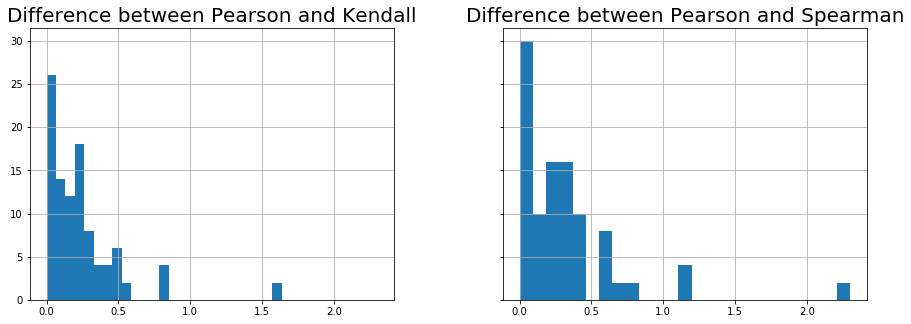

In [6]:
diff = pd.DataFrame(columns=['Difference between Pearson and Kendall', 'Difference between Pearson and Spearman'])
diffSP = abs(spearmanRank - np.arcsin(corrcoeff/2) * (6 / np.pi)) / corrcoeff
diff['Difference between Pearson and Spearman'] = diffSP.values.flatten()

diffKtauP = abs(KenTau - np.arcsin(corrcoeff) * (2 / np.pi)) / corrcoeff
diff['Difference between Pearson and Kendall'] = diffKtauP.values.flatten()
fig = diff.hist(bins=25, figsize = (15, 5), sharex=True, sharey=True)
[x.title.set_size(20) for x in fig.ravel()]

In [7]:
#Here plotted the histogram of absolut values of difference between the two, nomalized by the Pearson corr coeff

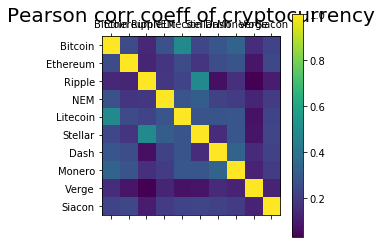

In [8]:
#%matplotlib tk
%matplotlib inline
plt.matshow(corrcoeff)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Pearson corr coeff of cryptocurrency', fontsize=20)
plt.colorbar()

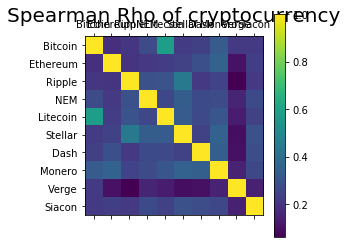

In [9]:
plt.matshow(spearmanRank)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Spearman Rho of cryptocurrency', fontsize=20)
plt.colorbar()

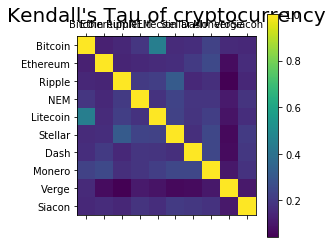

In [10]:
plt.matshow(KenTau)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Kendall\'s Tau of cryptocurrency', fontsize=20)
plt.colorbar()

[None, None, None, None]

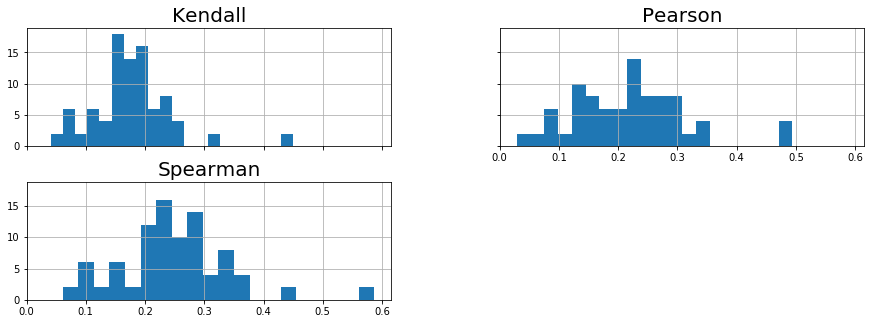

In [11]:
%matplotlib inline
ThreeCor = pd.DataFrame(columns=['Pearson', 'Kendall', 'Spearman'])
ThreeCor['Spearman'] = spearmanRank.values.flatten()[np.where(spearmanRank.values.flatten()!=1.0)]
ThreeCor['Kendall'] = KenTau.values.flatten()[np.where(KenTau.values.flatten()!=1.0)]
ThreeCor['Pearson'] = corrcoeff.values.flatten()[np.where(corrcoeff.values.flatten()!=1.0)]
fig = ThreeCor.hist(bins=20, figsize = (15, 5), sharex=True, sharey=True)
[x.title.set_size(20) for x in fig.ravel()]


In [12]:
betaMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns)
ssrMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns)
lenMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns)
varMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns)
for ref_col in logRC:
    for col in logRC:
        formu = f'{ref_col} ~ {col}'
        model = smf.ols(formula=formu, data=logRC)
        res = model.fit()
        betaMa[ref_col][col] = res.params[1]
        ssrMa[ref_col][col] = res.ssr
        lenMa[ref_col][col] = len(logRC[col].dropna())
        varMa[ref_col][col] = np.var(logRC[col])

In [13]:
betaMa * betaMa.T - corrcoeff ** 2

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,0,-4.16334e-17,1.04083e-17,1.38778e-16,4.996e-16,-8.32667e-17,1.38778e-16,-8.32667e-17,4.85723e-17,2.08167e-17
Ethereum,-4.16334e-17,0,1.73472e-17,-4.16334e-17,6.93889e-18,2.77556e-17,0,-8.32667e-17,1.47451e-17,6.93889e-18
Ripple,1.04083e-17,1.73472e-17,4.44089e-16,7.63278e-17,1.45717e-16,-8.32667e-17,-3.46945e-18,2.42861e-17,2.1684e-18,1.21431e-17
NEM,1.38778e-16,-4.16334e-17,7.63278e-17,-4.44089e-16,-1.38778e-17,-1.38778e-17,-2.77556e-17,-1.38778e-17,1.73472e-17,0
Litecoin,4.996e-16,6.93889e-18,1.45717e-16,-1.38778e-17,-2.22045e-16,5.55112e-17,1.52656e-16,-4.16334e-17,1.82146e-17,2.77556e-17
Stellar,-8.32667e-17,2.77556e-17,-8.32667e-17,-1.38778e-17,5.55112e-17,8.88178e-16,0,-2.22045e-16,1.82146e-17,1.38778e-17
Dash,1.38778e-16,0,-3.46945e-18,-2.77556e-17,1.52656e-16,0,-8.88178e-16,1.38778e-16,1.11022e-16,1.38778e-17
Monero,-8.32667e-17,-8.32667e-17,2.42861e-17,-1.38778e-17,-4.16334e-17,-2.22045e-16,1.38778e-16,-8.88178e-16,1.21431e-17,-4.85723e-17
Verge,4.85723e-17,1.47451e-17,2.1684e-18,1.73472e-17,1.82146e-17,1.82146e-17,1.11022e-16,1.21431e-17,8.88178e-16,3.81639e-17
Siacon,2.08167e-17,6.93889e-18,1.21431e-17,0,2.77556e-17,1.38778e-17,1.38778e-17,-4.85723e-17,3.81639e-17,8.88178e-16


In [14]:
betaMa / ((ssrMa / lenMa) / varMa + betaMa ** 2) ** 0.5 - corrcoeff

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,0,-1.66533e-16,0,2.22045e-16,4.44089e-16,-3.05311e-16,1.66533e-16,-1.66533e-16,8.32667e-17,0
Ethereum,-5.55112e-17,0,5.55112e-17,-2.77556e-17,0,0,1.11022e-16,-5.55112e-17,6.93889e-17,-5.55112e-17
Ripple,1.38778e-16,8.32667e-17,0,2.498e-16,3.60822e-16,-5.55112e-17,0,1.66533e-16,2.77556e-17,5.55112e-17
NEM,2.77556e-16,-2.22045e-16,2.22045e-16,0,0,-1.66533e-16,0,-5.55112e-17,5.55112e-17,-1.11022e-16
Litecoin,6.66134e-16,0,3.33067e-16,5.55112e-17,0,0,3.33067e-16,0,1.11022e-16,2.77556e-17
Stellar,-5.55112e-17,1.66533e-16,-2.22045e-16,1.11022e-16,2.22045e-16,0,1.11022e-16,-2.77556e-16,1.38778e-16,2.77556e-17
Dash,2.77556e-16,-5.55112e-17,-5.55112e-17,-5.55112e-17,2.77556e-16,-8.32667e-17,0,3.33067e-16,3.88578e-16,-8.32667e-17
Monero,-2.22045e-16,-2.77556e-16,0,-5.55112e-17,-5.55112e-17,-4.996e-16,2.22045e-16,0,-1.38778e-17,-1.94289e-16
Verge,2.22045e-16,6.93889e-17,4.51028e-17,1.11022e-16,1.38778e-16,9.71445e-17,4.16334e-16,1.249e-16,0,1.11022e-16
Siacon,1.11022e-16,2.77556e-17,4.16334e-17,1.11022e-16,8.32667e-17,2.77556e-17,1.38778e-16,-2.77556e-17,1.94289e-16,0


In [15]:
def linear_regression_for_two(name1, name2):
    plt.scatter(logRC[name1], logRC[name2], s=3, c='g')
    resB = smf.ols(formula=f"{name2} ~ {name1}", data=logRC).fit()
    plt.plot(logRC[name1], resB.params[0] + logRC[name1] * resB.params[1], 'r')
    resR = smf.ols(formula=f"{name1} ~ {name2}", data=logRC).fit()
    plt.plot(resR.params[0] + logRC[name2] * resR.params[1], logRC[name2], 'b')
    plt.legend([f'{name2} ~ {name1}', f'{name1} ~ {name2}'])
    plt.title(f'Linear fit {name2} vs {name1} and vice-versa', fontsize=20)
    plt.xlabel(f'{name1} returns', fontsize=18)
    plt.ylabel(f'{name2} returns', fontsize=18)
    
    print(f'Beta for {name1} is {resB.params[1]}')
    print(f'Beta for {name2} is {resR.params[1]}')
    print(f'R ^ 2 is {resB.rsquared} for {name1} and {resR.rsquared} for {name2}')
    print(f'Beta1 * Beta2 = {resB.params[1] * resR.params[1]}')

Beta for Ripple is 0.050687421362870085
Beta for Dash is 0.08832953671801405
R ^ 2 is 0.004477196446413201 for Ripple and 0.004477196446412979 for Dash
Beta1 * Beta2 = 0.004477196446413083


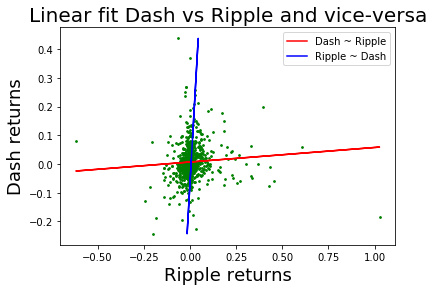

In [16]:
linear_regression_for_two('Ripple', 'Dash')

Beta for Ripple is 0.5650773927124212
Beta for Stellar is 0.43147780453662876
R ^ 2 is 0.24381835280083775 for Ripple and 0.24381835280083775 for Stellar
Beta1 * Beta2 = 0.24381835280083788


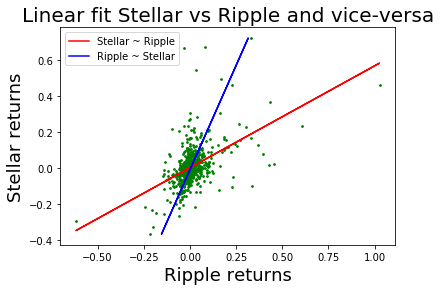

In [17]:
linear_regression_for_two('Ripple', 'Stellar')

Beta for Litecoin is 0.32503806865560514
Beta for Bitcoin is 0.7516094218296505
R ^ 2 is 0.24430167485486565 for Litecoin and 0.24430167485486565 for Bitcoin
Beta1 * Beta2 = 0.24430167485486562


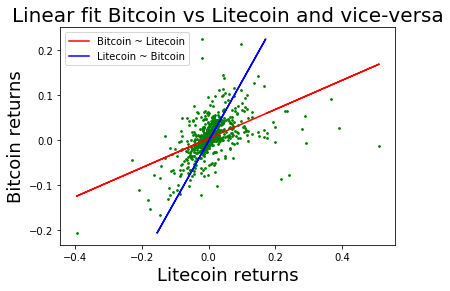

In [18]:
linear_regression_for_two('Litecoin', 'Bitcoin')

In [19]:
def correlation_ratio(X, Y, binx=200):
    binE = np.linspace(min(X), max(X), binx)
    binC = (binE[1:] + binE[:-1]) / 2
    coRatio = pd.DataFrame(columns=['X', 'Y', 'center'])
    coRatio['X'] = X
    coRatio['Y'] = Y
    for j in coRatio['X'].index:
        for i in range(len(binE)-1):
            if (coRatio['X'][j] >= binE[i]) & (coRatio['X'][j] < binE[i+1]):
                coRatio['center'][j] = (binE[i] + binE[1+i]) / 2
                
    return coRatio
    

In [20]:
def plot_relaRatio(name1, name2, binx=200, selectBin=5):
    coRatio = correlation_ratio(logRC[name1], logRC[name2], binx=binx).dropna()
    coRatio.reset_index(drop=True, inplace=True)
    binC = pd.DataFrame(np.unique(coRatio['center']))
    selectedBC = np.asarray(binC[binC.index % selectBin == 0])
    getASample = pd.DataFrame(index=range(len(coRatio)), columns=['Y', 'center'])
    j = 0
    for i in coRatio.index:
        if coRatio['center'][i] in selectedBC:
            getASample['Y'][j] = coRatio['Y'][i]
            getASample['center'][j] = coRatio['center'][i]
            j = j + 1
    plt.scatter(getASample['center'], getASample['Y'])
    regroup = coRatio.groupby(['center']).mean()
    plt.plot(regroup['Y'], 'r')

    varEYX = np.var(regroup['Y'], 0)
    varY = np.var(coRatio['Y'])
    print(f'correlation ratio : {varEYX / varY}')
    return (varEYX / varY)

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


correlation ratio : 0.4038945824175453


0.4038945824175453

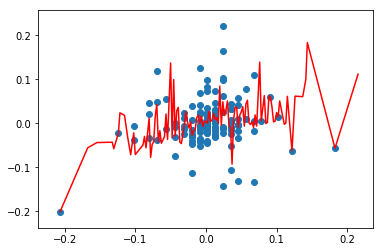

In [21]:
plot_relaRatio('Bitcoin', 'Ripple')

In [ ]:
binCoRatio = pd.DataFrame(index=range(0, 30), columns=['binx', 'coRatio'])
j = 0
for i in range(20, 500, 30):
    binCoRatio['coRatio'][j] =  plot_relaRatio('Bitcoin', 'Ripple', binx=i)
    binCoRatio['binx'][j] = i
    j = j + 1

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


correlation ratio : 0.6943167678389011
correlation ratio : 0.45449606944701393
correlation ratio : 0.46362801324184644
correlation ratio : 0.4219532102036201
correlation ratio : 0.41352355079397
correlation ratio : 0.4911362000286451


In [ ]:
plt.plot(binCoRatio['binx'], binCoRatio['coRatio'])

In [ ]:
#if binx is too high, each x is one bin, then the Var[E[Y|X]] can totally explain Var[Y], but what is a good bin
#number? 20 looks good, it's very low in this set but still achieve quite high correlation ratio

In [ ]:
miMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns, dtype=float)
for ref_col in logRC:
    for col in logRC:
        miMa[ref_col][col] = metrics.mutual_info_score(logRC[ref_col], logRC[col])
miMa

In [ ]:
plt.matshow(miMa)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Mutual information of cryptocurrency', fontsize=20)
plt.colorbar()

In [ ]:
miMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns, dtype=float)
for ref_col in logRC:
    for col in logRC:
        miMa[ref_col][col] = metrics.normalized_mutual_info_score(logRC[ref_col], logRC[col])
miMa

In [ ]:
plt.matshow(miMa)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Mutual information of cryptocurrency', fontsize=20)
plt.colorbar()

In [ ]:
-0.5 * np.log(1 - corrcoeff ** 2)

In [ ]:
#Doesn't match, not linear dependant

In [ ]:
def report_GrangerC_test(name1, name2, maxL = 20):
    
    testRe = pd.DataFrame(index=range(maxL), columns=['lag', 'ssr F', 'ssr chi2', 'likelihood', 'para F'], dtype=float)
    results = grangercausalitytests(logRC[[name1, name2]], maxlag=maxL, verbose=False)
    for i in range(maxL):
        testRe['lag'][i] = i + 1
        testRe['ssr F'][i] = results[i+1][0]['ssr_ftest'][1]
        testRe['ssr chi2'][i] = results[i+1][0]['ssr_chi2test'][1]
        testRe['likelihood'][i] = results[i+1][0]['lrtest'][1]
        testRe['para F'][i] = results[i+1][0]['params_ftest'][1]
        
    return testRe


In [ ]:
def loop_greanger(name1, name2, maxL):
    bitForRip = report_GrangerC_test(name1, name2, maxL)
    plt.figure()
    plt.plot(bitForRip['lag'], bitForRip['ssr F'], bitForRip['lag'], bitForRip['ssr chi2'], bitForRip['lag'], bitForRip['likelihood'], bitForRip['lag'], bitForRip['para F'])
    plt.plot(bitForRip['lag'], np.ones(len(bitForRip['lag'])) * 0.05)
    plt.plot(bitForRip['lag'], np.ones(len(bitForRip['lag'])) * 0.025)
    plt.plot(bitForRip['lag'], np.ones(len(bitForRip['lag'])) * 0.01)
    plt.legend(['ssr F', 'ssr chi2', 'likelihood', 'para F', '0.05', '0.025', '0.01'])
    plt.title(f'{name2} cause {name1}', fontsize=20)
    plt.xlabel('lags', fontsize=18)
    plt.ylabel('p-values', fontsize=18)

In [ ]:
#The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, does NOT Granger
#cause the time series in the first column, x1.

In [ ]:
loop_greanger('Bitcoin', 'Ripple', 20)

In [ ]:
for ref_col in logRC:

    #for col in logRC:
    loop_greanger('Ripple', ref_col, 20)

In [ ]:
def form_portfolio(corMa, name, nAssets, data):
    
    allCor = corMa[name].sort_values()
    weights = allCor[-(nAssets+1) : -1] / sum(allCor[-(nAssets+1) : -1])
    portfolio = (data[weights.index] * weights).sum(axis=1)
    
    return portfolio

In [ ]:
def long_short(corMa, corName, name, nAssets, data, plot=True):
    hedge = form_portfolio(corMa, name, nAssets, data)
    LS = data[name] - hedge
    if plot:
        plt.figure()
        plt.plot(data[name])
        plt.plot(LS, alpha=0.5)
        plt.legend([f'{name}', 'hedged portfolio'])
        plt.title(f'Hedge {name} with {nAssets} most related assets by {corName}', fontsize=20)
        plt.xlabel('time', fontsize=18)
        plt.ylabel('return', fontsize=18)
    return np.var(LS)


In [ ]:
long_short(corrcoeff, 'Pearson', 'Ripple', 3, logRC)

In [ ]:
hedgeResult = pd.DataFrame(index=range(1, 10), columns=['Pearson', 'Spearman', 'Kendall', 'MI', 'original'], dtype=float)
hedgeResult['original'][:] = np.var(logRC['Ripple'])
for i in range(1, 10):
    hedgeResult['Pearson'][i] = long_short(corrcoeff, 'Pearson', 'Ripple', i, logRC)
    hedgeResult['Spearman'][i] = long_short(spearmanRank, 'Spearman', 'Ripple', i, logRC)
    hedgeResult['Kendall'][i] = long_short(KenTau, 'Kendall', 'Ripple', i, logRC)
    hedgeResult['MI'][i] = long_short(miMa, 'MI', 'Ripple', i, logRC)

In [ ]:
hedgeResult

In [ ]:
def moving_window_outOfSample(train, test, name):
    finalRe = pd.DataFrame(columns=['Pearson', 'Spearman', 'Kendall', 'MI', 'original'], dtype=float)
    for i in range(len(logRC[name]) - train - test):
        trainSet = logRC.iloc[i : i+train]
        testSet = logRC.iloc[i+train : i+train+test]
        KenTau = trainSet.corr(method='kendall')
        corrcoeff = trainSet.corr()
        spearmanRank = trainSet.corr(method='spearman')
        miMa = pd.DataFrame(index=logRC.columns, columns=logRC.columns, dtype=float)
        for ref_col in logRC:
            for col in logRC:
                miMa[ref_col][col] = metrics.normalized_mutual_info_score(trainSet[ref_col], trainSet[col])

        hedgeResult = pd.DataFrame(index=range(1, 10), columns=['Pearson', 'Spearman', 'Kendall', 'MI', 'original'], dtype=float)
        hedgeResult['original'][:] = np.var(testSet['Ripple'])
        for j in range(1, 10):
            hedgeResult['PearoutOfSampleson'][j] = long_short(corrcoeff, 'Pearson', 'Ripple', j, testSet, plot=False)
            hedgeResult['Spearman'][j] = long_short(spearmanRank, 'Spearman', 'Ripple', j, testSet, plot=False)
            hedgeResult['Kendall'][j] = long_short(KenTau, 'Kendall', 'Ripple', j, testSet, plot=False)
            hedgeResult['MI'][j] = long_short(miMa, 'MI', 'Ripple', j, testSet, plot=False)
        
        finalRe = finalRe.append(hedgeResult)
    return finalRe
        

In [ ]:
outOfSample = moving_window_outOfSample(365, 91, 'Ripple')
testRe = outOfSample.groupby([outOfSample.index]).mean()
testRe365_91

In [ ]:
outOfSample = moving_window_outOfSample(182, 91, 'Ripple')
testRe = outOfSample.groupby([outOfSample.index]).mean()
testRe182_91

In [ ]:
outOfSample = moving_window_outOfSample(730, 91, 'Ripple')
testRe = outOfSample.groupby([outOfSample.index]).mean()
testRe730_91

In [ ]:
outOfSample = moving_window_outOfSample(365, 30, 'Ripple')
testRe = outOfSample.groupby([outOfSample.index]).mean()
testRe365_30

In [ ]:
outOfSample = moving_window_outOfSample(365, 182, 'Ripple')
testRe = outOfSample.groupby([outOfSample.index]).mean()
testRe365_182